<a href="https://colab.research.google.com/github/Zalaxci/DigitRecognitionNN/blob/main/CollabNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [2]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [28]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 28, 28), Targets:(60000,)
Test Size - Inputs:(10000, 28, 28), Targets:(10000,)


# Displaying Random Digits

In [4]:
rows = 5
digits_per_row = 5

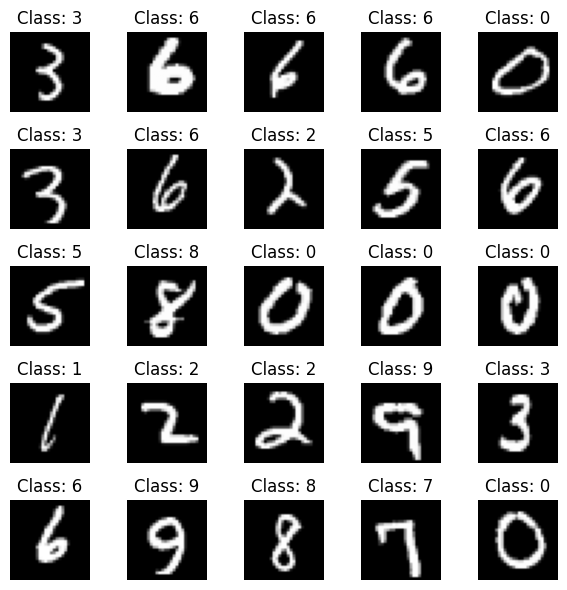

In [5]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [29]:
x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [7]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9421 - loss: 0.2054 - val_accuracy: 0.9401 - val_loss: 0.2113
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9446 - loss: 0.1956 - val_accuracy: 0.9419 - val_loss: 0.2025
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9448 - loss: 0.1906 - val_accuracy: 0.9419 - val_loss: 0.1983
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9497 - loss: 0.1795 - val_accuracy: 0.9441 - val_loss: 0.1952
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9518 - loss: 0.1717 - val_accuracy: 0.9442 - val_loss: 0.1879
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9518 - loss: 0.1663 - val_accuracy: 0.9447 - val_loss: 0.1828
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9540 - loss: 0.1611 - val_accuracy: 0.9498 - val_loss: 0.1777
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9546 - loss: 0.1588

# Display Loss and Accuracy per Training Epoch

In [10]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

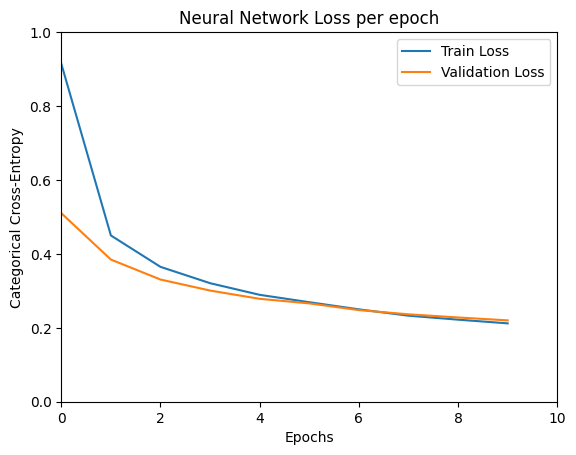

In [11]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

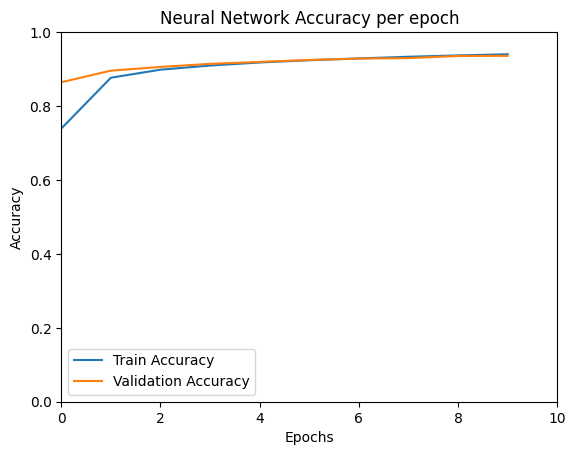

In [12]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


In [13]:
# Firstly, let's define a handy function to train to allow for easier training of each model
def configure_and_train(trainee: tf.keras.Model, training_epochs: int):
    # Configure ("compile") the model - the globally defined loss, optimizer & metrics are to be used always
    trainee.compile(loss=loss, optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), metrics=metrics)
    # Return training results & history - obviously, again, the training data passed as parameters are kept unchanged
    return trainee.fit(
        x=x_train,
        y=y_train,
        epochs=training_epochs,
        validation_data=(x_test, y_test)
    )

In [14]:
# Now, let's try adjusting the number of hidden layers & neurons per layer - is larger depth or width preferable with other factors such as activation function & epoch size constant?
# In the first case, we remove one of the hidden layers but double the number of neurons from 256 to 512
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=512, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs')
])
# In the second case, let's try adding one more layer of same size (256 neurons), without further changes
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-3'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs')
])
# Finally, we create 2 more models, with 2 and 3 layers respectively but only 128 neurons - will this significantly limit the AI's predictive power, or is depth more important than width?
model3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=128, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=128, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs')
])
model4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=128, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=128, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=128, activation=activation, name='hidden-3'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs')
])
# We now train each model with 15 epochs, saving the history thoughout epochs in a list by utilizing python's helpful list looping / maping syntax
# I was considering testing each model with different epoch numbers - but by virtue of the training history the accuracy & loss we'd get if using <20 epochs is also available
training_histories = [ configure_and_train(modelN, 15).history for modelN in [ model1, model2, model3, model4 ] ]

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6699 - loss: 1.0527 - val_accuracy: 0.8867 - val_loss: 0.3993
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8899 - loss: 0.3858 - val_accuracy: 0.9066 - val_loss: 0.3191
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9116 - loss: 0.3101 - val_accuracy: 0.9176 - val_loss: 0.2800
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9224 - loss: 0.2718 - val_accuracy: 0.9249 - val_loss: 0.2604
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9305 - loss: 0.2480 - val_accuracy: 0.9326 - val_loss: 0.2398
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9361 - loss: 0.2286 - val_accuracy: 0.9328 - val_loss: 0.2280
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9409 - loss: 0.2126 - val_accuracy: 0.9379 - val_loss: 0.2216
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9429 - loss: 0.

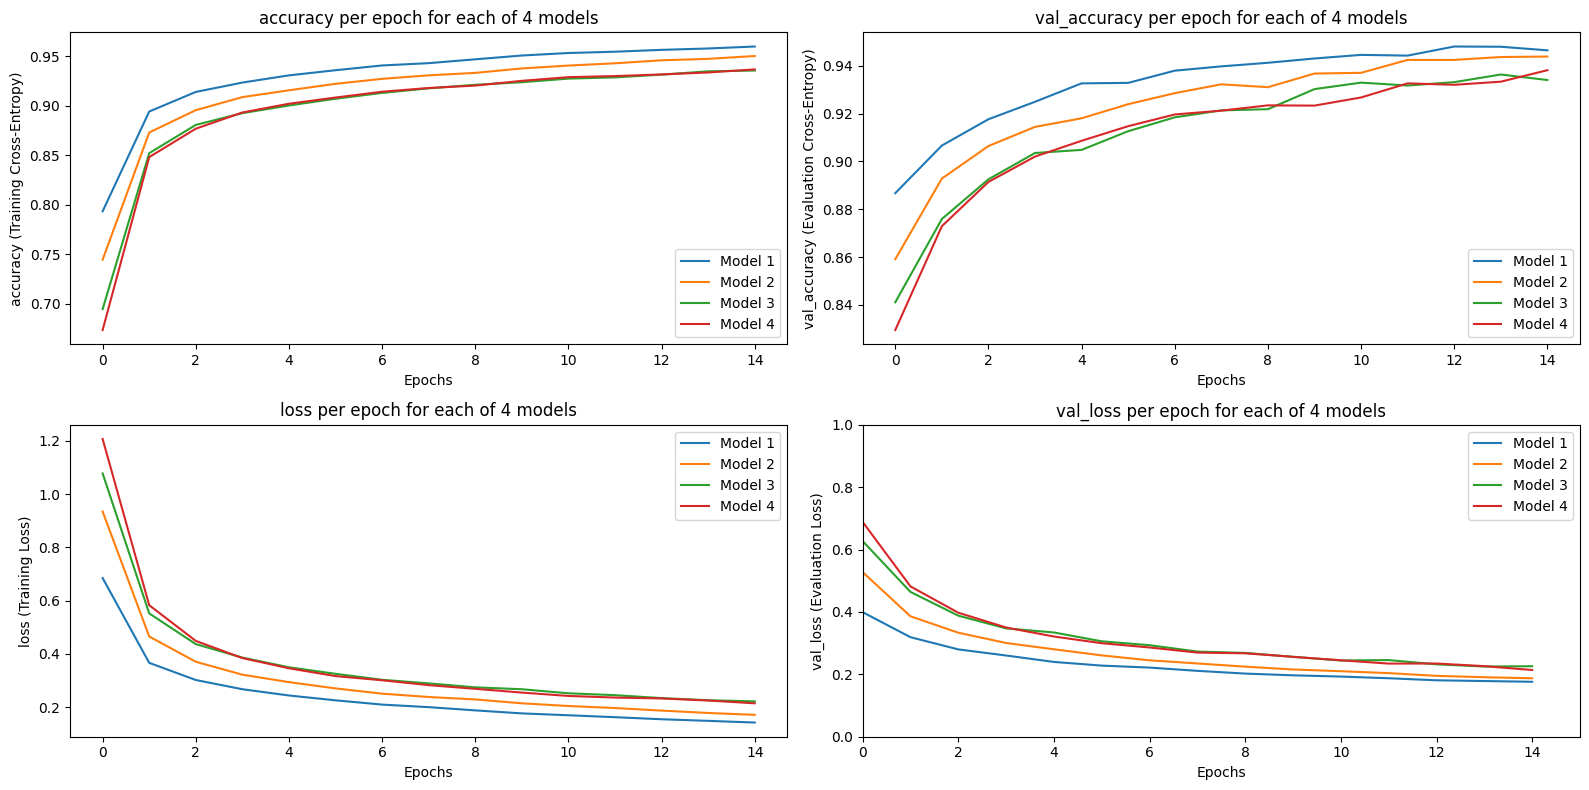

In [15]:
# Size the figures correctly
plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = True
# Create a function to graph each property for each model - this will also come in handy later
def graph_property_of_models(model_histories, property_name, property_description, epoch_count, axis):
    axis.set_title(f"{property_name} per epoch for each of {len(model_histories)} models")
    axis.set_ylabel(f"{property_name} ({property_description})")
    axis.set_xlabel("Epochs")
    for i in range(0, len(model_histories)):
        axis.plot(model_histories[i][property_name], label=f"Model {i+1}")
        plt.xlim(0, epoch_count)
        plt.ylim(0, 1)
        axis.legend()
# Create the plots to graph each property in (2x2 grid for 4 graphs in total)
_, axes = plt.subplots(nrows=2, ncols=2)
# Graph each property
graph_property_of_models(training_histories, "accuracy", "Training Cross-Entropy", 15, axes[0][0])
graph_property_of_models(training_histories, "val_accuracy", "Evaluation Cross-Entropy", 15, axes[0][1])
graph_property_of_models(training_histories, "loss", "Training Loss", 15, axes[1][0])
graph_property_of_models(training_histories, "val_loss", "Evaluation Loss", 15, axes[1][1])

We notice the second best performing model is the one with only 1 layer but more neurons than the original one. In previous training sessions this was the best performing model, and even still, now it performed better than all but the reference model. This is surprising since in more complex image recognition Neural Networks networks with many (dozens or even hundreds) layers but less parameters were found to be more accurate. Even intuitively, due to the ability of the AI to recognize patterns in the pictures in stages, and since a single layer might lead to overfitting (learning very specific patterns without "depth" / ability to generalize) one should expect the opposite results. We even notice that model4 is barely more accurate than model3 and similarly model2 achieves only slightly better results than the reference model! It could be that our problem is simple enough there's no need for additional layers but to the contrary these slow down the AI's training. Nonetheless, let's try some more configurations.

In [35]:
# We shall try making the model's hidden layers unequal when it comes to their neuron number, increasing the overall number of neurons
# Let's firstly try a model 384 = 256 + 128 neurons in the first layer and 256 in the second
modelA = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=384, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs')
])
# Now let's try the inverse - we should expect better results in the first case as the number of inputs is significantly bigger than the outputs (512 >> 10)
modelB = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=384, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs')
])
training_histories = [ training_histories[0], configure_and_train(modelA, 15).history, configure_and_train(modelB, 15).history ]

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6198 - loss: 1.2491 - val_accuracy: 0.8740 - val_loss: 0.4777
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8767 - loss: 0.4531 - val_accuracy: 0.8992 - val_loss: 0.3659
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9004 - loss: 0.3577 - val_accuracy: 0.9120 - val_loss: 0.3148
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9102 - loss: 0.3137 - val_accuracy: 0.9197 - val_loss: 0.2820
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9199 - loss: 0.2803 - val_accuracy: 0.9241 - val_loss: 0.2632
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9256 - loss: 0.2578 - val_accuracy: 0.9265 - val_loss: 0.2486
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9310 - loss: 0.2406 - val_accuracy: 0.9304 - val_loss: 0.2384
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9344 - loss: 0

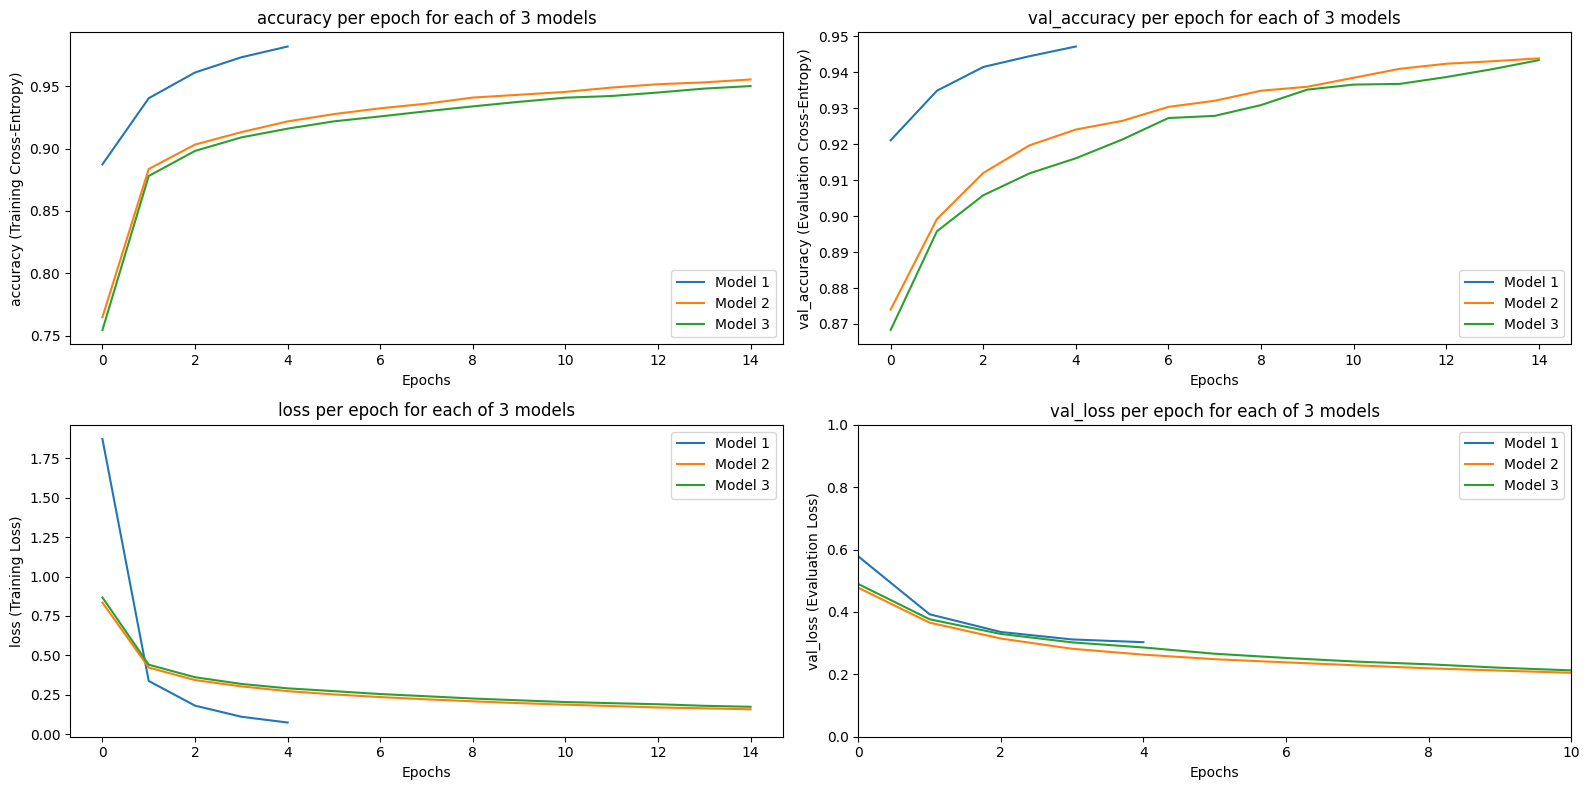

In [36]:
# Again, we graph the results (training histories contains the previous best model1 as reference)
_, axes = plt.subplots(nrows=2, ncols=2)
graph_property_of_models(training_histories, "accuracy", "Training Cross-Entropy", 10, axes[0][0])
graph_property_of_models(training_histories, "val_accuracy", "Evaluation Cross-Entropy", 10, axes[0][1])
graph_property_of_models(training_histories, "loss", "Training Loss", 10, axes[1][0])
graph_property_of_models(training_histories, "val_loss", "Evaluation Loss", 10, axes[1][1])

As expected, modelA is better than modelB, but still, none of them surpasses the accuracy of model 1. We conclude the addition of more layers has little impact in the efficiency of the model, despite what should be expected. Still, let's pick model1 (1 layer of 512 neurons) and modelA (2 layers of 384 and 256 neurons) and modify their activation functions to create 8 new AI models in total (2 hidden layer structures x 4 activation functions). The selected activation functions, picked for their simplicity and widespread use are:
- ReLU: max(x, 0)
- ReLU6: ReLU but with an upper limit of 6 apart from a bottom limit - or the straight line of y=x bounded between 0 and 6
- GELU (Gaussian Error Linear Unit): A modified, smooth and more efficient version of ReLU
- The Sigmoid function, 1 / (1 + exp(-x)), which unlike the Relu is differentiatable and upper bounded but unlike tanh returns only positive values
I set the number of epochs to 5 so as to not waste time

In [38]:
# For reusability's shake a function is to be used to create the models
def create_custom_activation_models(activation_func_name: str ):
    return (
        tf.keras.Sequential([
            tf.keras.layers.Input(shape=(784,), name='input'),
            tf.keras.layers.Dense(units=256, activation=activation_func_name, name='hidden-1'),
            tf.keras.layers.Dense(units=256, activation=activation_func_name, name='hidden-2'),
            tf.keras.layers.Dense(units=10, activation='softmax', name='outputs')
        ]),
        tf.keras.Sequential([
            tf.keras.layers.Input(shape=(784,), name='input'),
            tf.keras.layers.Dense(units=384, activation=activation_func_name, name='hidden-1'),
            tf.keras.layers.Dense(units=256, activation=activation_func_name, name='hidden-2'),
            tf.keras.layers.Dense(units=10, activation='softmax', name='outputs')
        ])
    )
# Create the models with the afformentioned activation functions to compare to tanh
relu_models = create_custom_activation_models("relu")
relu6_models = create_custom_activation_models("relu6")
gelu_models = create_custom_activation_models("gelu")
sigmoid_models = create_custom_activation_models("sigmoid")
# Iteratively train each model, saving the resulting training histories in a list
training_histories = []
for model_pair in [ relu_models, relu6_models, gelu_models, sigmoid_models ]:
    training_histories.append(configure_and_train(model_pair[0], 5).history)
    training_histories.append(configure_and_train(model_pair[1], 5).history)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.8313 - loss: 4.3776 - val_accuracy: 0.9231 - val_loss: 0.3896
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 0.9417 - loss: 0.2744 - val_accuracy: 0.9373 - val_loss: 0.2946
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9620 - loss: 0.1496 - val_accuracy: 0.9424 - val_loss: 0.2639
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9741 - loss: 0.0981 - val_accuracy: 0.9453 - val_loss: 0.2468
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9816 - loss: 0.0687 - val_accuracy: 0.9478 - val_loss: 0.2441
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8368 - loss: 4.3607 - val_accuracy: 0.9247 - val_loss: 0.3125
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9381 - loss: 0.2396 - val_accuracy: 0.9410 - val_loss: 0.2410
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9593 - loss: 0.1442 -

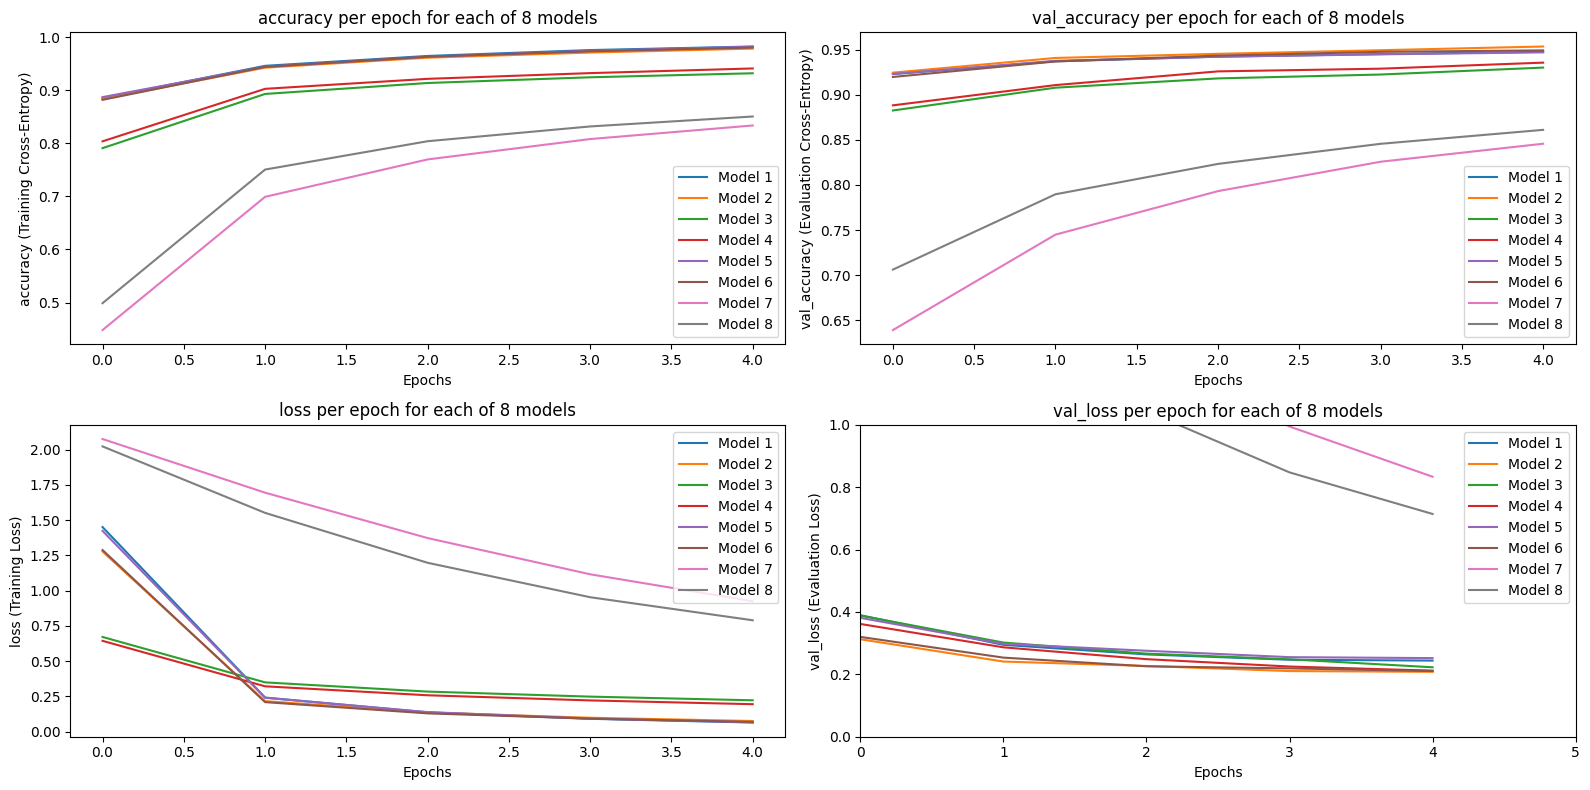

In [39]:
# Like previously, graph the results
_, axes = plt.subplots(nrows=2, ncols=2)
graph_property_of_models(training_histories, "accuracy", "Training Cross-Entropy", 5, axes[0][0])
graph_property_of_models(training_histories, "val_accuracy", "Evaluation Cross-Entropy", 5, axes[0][1])
graph_property_of_models(training_histories, "loss", "Training Loss", 5, axes[1][0])
graph_property_of_models(training_histories, "val_loss", "Evaluation Loss", 5, axes[1][1])

While the results of training the models are less clear this time, I think we can deduce that model 2 as well as model 2 (2 layers of 384 & 256 neurons with GELU and ReLU activation functions respectively) are the most accurate. But what is perhaps most obvious it how badly the models using the Sigmoid function failed to yield accurate results (especially model 8). This is likely due to the vanishing gradient problem (the derivative getting smaller and smaller for very big or small values) and the Sigmoid function not being centered at 0 (unlike tanh). The last hyperparameter to try adjusting is the learning step.

In [19]:
def train_with_custom_learnstep(trainee: tf.keras.Model, learnstep: float):
    # Configure ("compile") the model - the globally defined loss, optimizer & metrics are to be used always
    trainee.compile(loss=loss, optimizer=tf.keras.optimizers.SGD(learning_rate=learnstep), metrics=metrics)
    # Return training results & history - obviously, again, the training data passed as parameters are kept unchanged
    return trainee.fit(
        x=x_train,
        y=y_train,
        epochs=5,
        validation_data=(x_test, y_test)
    )
training_histories = []
for learnstep in [ 0.0005, 0.005, 0.01 ]:
    training_histories.append(train_with_custom_learnstep(create_custom_activation_models("relu")[1], learnstep).history)
    training_histories.append(train_with_custom_learnstep(create_custom_activation_models("gelu")[1], learnstep).history)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8388 - loss: 5.0911 - val_accuracy: 0.9211 - val_loss: 0.5783
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9364 - loss: 0.3851 - val_accuracy: 0.9349 - val_loss: 0.3926
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9591 - loss: 0.1927 - val_accuracy: 0.9415 - val_loss: 0.3358
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9730 - loss: 0.1118 - val_accuracy: 0.9445 - val_loss: 0.3119
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9819 - loss: 0.0750 - val_accuracy: 0.9472 - val_loss: 0.3031
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8407 - loss: 4.4708 - val_accuracy: 0.9190 - val_loss: 0.5081
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9321 - loss: 0.3935 - val_accuracy: 0.9318 - val_loss: 0.3745
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9546 - loss: 0.2104 - 

While a learning step / rate of 0.0005 < 0.001 yields similar results to the reference models, anything higher results in near 0 accuracy and very high loss. This is very most likely due to the neural network overshooting towards the direction of steepest descent when and as a result not actually descending down the multidimensional function graph when gradient descent is performed. In other words, whenever a valley with a minimum is found, instead of changing the weights appropriately to navigate towards the bottom of the valley, the training algorithm overshoots, rendering the gradient descent process useless. What's funny is that the loss is "nan" = "Not A Number" in python, so it seems the cross entropy isn't even calculatable (?)

## 2. Validation: Show 1 misclassified digit from each class.

We use the model with 2 layers & GELU activation function (as well as the standard step of 0.001) as testing model. We predict every one of the test values using the "x_test" set of matrices as input to the "predict" method, and the results are compared to the true identification ("y_test"). The np.argmax function of numpy is used to find out the digit the AI guess (the one with the largest probability number) as well as the index of the number 1 in the array with the correct classification. A loop is used to print one out of each incorrectly marked digit.

In [20]:
y_predicted = gelu_models[1].predict(x_test)
wrongly_predicted = [
    (np.argmax(pred_digit_probabilities), np.argmax(correct_dig_array))
    for correct_dig_array, pred_digit_probabilities in zip(y_test, y_predicted)
    if correct_dig_array[np.argmax(pred_digit_probabilities)] != 1
]
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i, (ai_prediction, true_digit) in enumerate(wrongly_predicted):
    if (true_digit in digits):
        print(f"The digit {true_digit} was incorrectly identified as {ai_prediction} (incorrect guess {i+1})")
        digits.remove(true_digit)
        if not digits:
            break

print(wrongly_predicted, len(wrongly_predicted)/len(x_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
The digit 4 was incorrectly identified as 0 (incorrect guess 1)
The digit 2 was incorrectly identified as 1 (incorrect guess 2)
The digit 9 was incorrectly identified as 4 (incorrect guess 3)
The digit 3 was incorrectly identified as 2 (incorrect guess 7)
The digit 5 was incorrectly identified as 3 (incorrect guess 12)
The digit 6 was incorrectly identified as 0 (incorrect guess 18)
The digit 8 was incorrectly identified as 3 (incorrect guess 20)
The digit 0 was incorrectly identified as 9 (incorrect guess 22)
The digit 7 was incorrectly identified as 3 (incorrect guess 23)
The digit 1 was incorrectly identified as 3 (incorrect guess 44)
[(np.int64(0), np.int64(4)), (np.int64(1), np.int64(2)), (np.int64(4), np.int64(9)), (np.int64(3), np.int64(2)), (np.int64(3), np.int64(9)), (np.int64(7), np.int64(2)), (np.int64(2), np.int64(3)), (np.int64(6), np.int64(4)), (np.int64(3), np.int64(9)), (np.int64(8), np.int64(4)), (np.int64(7), np.int64(2)), (np.

## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

In case modifying a model's hyperparameters doesn't yield satisfactory results, one can change the shape of the data or completely reimplement the model in a different architecture. For starters, let's try normalizing the data, i.e. changing the range of each value (corresponding to a pixel's brightness) from [0, 255] to [0, 1] firstly and then to [-0.5, 0.5]. Which of the 3 data shapes will yield the better results?

In [40]:
# Normalize to [0, 1]
x_train = x_train / 255
x_test = x_test / 255
print(x_train, x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Retrain the reference models (2 layers using ReLU & GELU activation functions)
new_relu_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=384, activation="relu", name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation="relu", name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs')
])
new_gelu_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=384, activation="gelu", name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation="gelu", name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs')
])
training_histories = [
    configure_and_train(new_relu_model, 5).history,
    configure_and_train(new_gelu_model, 5).history
]

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3931 - loss: 2.0175 - val_accuracy: 0.7929 - val_loss: 1.0985
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8096 - loss: 0.9555 - val_accuracy: 0.8610 - val_loss: 0.6241
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8572 - loss: 0.6021 - val_accuracy: 0.8828 - val_loss: 0.4798
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8774 - loss: 0.4816 - val_accuracy: 0.8927 - val_loss: 0.4133
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8885 - loss: 0.4222 - val_accuracy: 0.8994 - val_loss: 0.3749
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3820 - loss: 2.0850 - val_accuracy: 0.7509 - val_loss: 1.3649
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7663 - loss: 1.1723 - val_accuracy: 0.8385 - val_loss: 0.7120
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8388 - loss: 0.6742 - 

In [41]:
# Now, let's try normalizing to [-0.5, 0.5]
x_train = x_train - 0.5
x_test = x_test - 0.5
print(x_train, x_test)

[[-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 ...
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]] [[-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 ...
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]]


In [ ]:
# Retrain the reference models (2 layers using ReLU & GELU activation functions)
new_relu_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=384, activation="relu", name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation="relu", name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs')
])
new_gelu_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=384, activation='gelu', name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation='gelu', name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs')
])
training_histories = [
    configure_and_train(new_relu_model, 5).history,
    configure_and_train(new_gelu_model, 5).history
]

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4948 - loss: 1.8757 - val_accuracy: 0.8002 - val_loss: 0.9344
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8196 - loss: 0.8265 - val_accuracy: 0.8615 - val_loss: 0.5788
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8615 - loss: 0.5593 - val_accuracy: 0.8805 - val_loss: 0.4640
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8778 - loss: 0.4635 - val_accuracy: 0.8908 - val_loss: 0.4078
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8872 - loss: 0.4140 - val_accuracy: 0.8965 - val_loss: 0.3748
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3746 - loss: 2.0366 - val_accuracy: 0.7775 - val_loss: 1.0273
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8071 - loss: 0.8750 - val_accuracy: 0.8576 - val_loss: 0.5604
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8601 - loss: 0.5437 - v

## Accuracy values:
1.   ***RELU MODEL***: 0.8885, 0.8872 << 0.9788
2.   ***GELU MODEL***: 0.8795, 0.8859 << 0.9826

We notice that normalizing the data has a negative affect on accuracy for a Recursive Neural Network. Let's try reimplementing the number guessing model using a convolution neural network architecture, which has been found to be more effective in image recognition applications.

In [43]:
# We start by reshaping the data to give each image 3 dimensions,as required by Keras for a convolution neural network
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 28, 28, 1), Targets:(60000, 10)
Test Size - Inputs:(10000, 28, 28, 1), Targets:(10000, 10)


In [45]:
filter_number = 8
filter_size = 3
pool_size = 2
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filter_number, filter_size, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=pool_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])
cnn_model.compile("adam", loss=loss, metrics=metrics)
training_history = cnn_model.fit(
    x_train,
    y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8494 - loss: 0.5297 - val_accuracy: 0.9411 - val_loss: 0.2014
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9450 - loss: 0.1944 - val_accuracy: 0.9616 - val_loss: 0.1329
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9611 - loss: 0.1346 - val_accuracy: 0.9674 - val_loss: 0.1048
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9680 - loss: 0.1067 - val_accuracy: 0.9713 - val_loss: 0.0907
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9735 - loss: 0.0906 - val_accuracy: 0.9727 - val_loss: 0.0825
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9765 - loss: 0.0797 - val_accuracy: 0.9740 - val_loss: 0.0774
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9790 - loss: 0.0716 - val_accuracy: 0.9752 - val_loss: 0.0742
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9809 - 

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
